# Importera och formatera data

In [172]:
import yfinance as yf

# Hämta data från Yahoo Finance
omxs30 = yf.Ticker("^OMX")
omxs30 = omxs30.history(period="max")

# Formatera datumen utan klockslag
omxs30.index = omxs30.index.strftime('%Y-%m-%d')

# Visa resultatet
omxs30


c:\Users\svafre\vscode projects\venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-11-20,594.119995,594.119995,572.469971,587.710022,190921000,0.0,0.0
2008-11-21,587.710022,594.799988,560.940002,567.609985,188222800,0.0,0.0
2008-11-24,567.609985,629.229980,567.609985,626.460022,197755700,0.0,0.0
2008-11-25,626.460022,644.549988,614.369995,634.020020,258695400,0.0,0.0
2008-11-26,634.020020,638.789978,617.489990,628.859985,192007800,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-16,2393.590088,2415.189941,2392.590088,2408.919922,0,0.0,0.0
2024-02-20,2411.510010,2417.030029,2402.280029,2414.790039,0,0.0,0.0
2024-02-21,2415.409912,2417.709961,2403.179932,2414.969971,0,0.0,0.0


In [173]:
#Visa vilken kolumn som innehåller index för de olika raderna
omxs30.index

Index(['2008-11-20', '2008-11-21', '2008-11-24', '2008-11-25', '2008-11-26',
       '2008-11-27', '2008-11-28', '2008-12-01', '2008-12-02', '2008-12-03',
       ...
       '2024-02-09', '2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15',
       '2024-02-16', '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23'],
      dtype='object', name='Date', length=3829)

<Axes: xlabel='Date'>

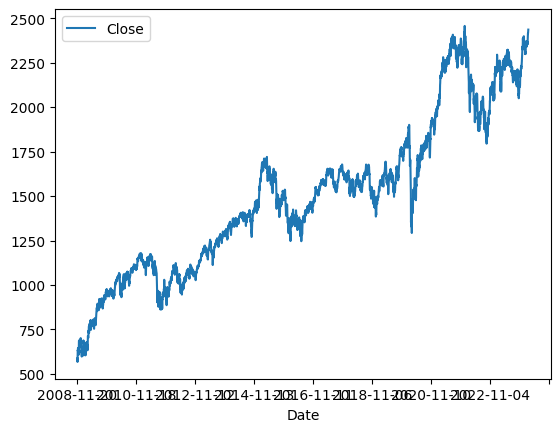

In [174]:
#Plotta linjegraf för att visualisera utvecklingen av OMXS30.
omxs30.plot.line(y='Close', use_index = True)

In [175]:
#Raderad kolumner med data som inte kommer användas.

del omxs30['Dividends']
del omxs30['Stock Splits']

omxs30

,Open,High,Low,Close,Volume
Date,,,,,
2008-11-20,594.119995,594.119995,572.469971,587.710022,190921000
2008-11-21,587.710022,594.799988,560.940002,567.609985,188222800
2008-11-24,567.609985,629.229980,567.609985,626.460022,197755700
2008-11-25,626.460022,644.549988,614.369995,634.020020,258695400
2008-11-26,634.020020,638.789978,617.489990,628.859985,192007800
...,...,...,...,...,...
2024-02-16,2393.590088,2415.189941,2392.590088,2408.919922,0
2024-02-20,2411.510010,2417.030029,2402.280029,2414.790039,0
2024-02-21,2415.409912,2417.709961,2403.179932,2414.969971,0


In [176]:
#Skriv ut hela OMXS30 dataframe för att se hur många nollvärden som finns i kolumnen volume.
#Verkar som att datan till största del är 0 efter 10 Dec 2014, vilken kan bero på att vi analyserar ett index och inte en aktie eller fond, men låter modellen behålla kolumnen så den blir mer generell.

#display(omxs30.to_string())

In [177]:
#Skapar en 'Tomorrow' kolumn, den behövs för att kunna skapa vår 'Target' kolumn.
omxs30['Tomorrow'] = omxs30['Close'].shift(-1)
omxs30

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2008-11-20,594.119995,594.119995,572.469971,587.710022,190921000,567.609985
2008-11-21,587.710022,594.799988,560.940002,567.609985,188222800,626.460022
2008-11-24,567.609985,629.229980,567.609985,626.460022,197755700,634.020020
2008-11-25,626.460022,644.549988,614.369995,634.020020,258695400,628.859985
2008-11-26,634.020020,638.789978,617.489990,628.859985,192007800,645.510010
...,...,...,...,...,...,...
2024-02-16,2393.590088,2415.189941,2392.590088,2408.919922,0,2414.790039
2024-02-20,2411.510010,2417.030029,2402.280029,2414.790039,0,2414.969971
2024-02-21,2415.409912,2417.709961,2403.179932,2414.969971,0,2426.379883


In [178]:
#Skapar vår 'Target' kolumn. Funktionen .astype(int) ser till att vi omvandlar boolean till integer vilket behövs för att hantera data.
# 1 = värdet gick UPP kommande handelsdag. 0 = värdet gick NER kommande handelsdag.
omxs30['Target'] = (omxs30['Tomorrow'] > omxs30['Close']).astype(int)
omxs30

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2008-11-20,594.119995,594.119995,572.469971,587.710022,190921000,567.609985,0
2008-11-21,587.710022,594.799988,560.940002,567.609985,188222800,626.460022,1
2008-11-24,567.609985,629.229980,567.609985,626.460022,197755700,634.020020,1
2008-11-25,626.460022,644.549988,614.369995,634.020020,258695400,628.859985,0
2008-11-26,634.020020,638.789978,617.489990,628.859985,192007800,645.510010,1
...,...,...,...,...,...,...,...
2024-02-16,2393.590088,2415.189941,2392.590088,2408.919922,0,2414.790039,1
2024-02-20,2411.510010,2417.030029,2402.280029,2414.790039,0,2414.969971,1
2024-02-21,2415.409912,2417.709961,2403.179932,2414.969971,0,2426.379883,1


In [179]:
#Skapa modell som ett objekt av typ RandomForestClassifier.

#n_estimators: antalet beslutsträd. En större mängd träd kan ge en mer robust modell, men det ökar också träningstiden och minnet som krävs.
#min_samples_split: Detta är det minsta antalet datapunkter som krävs för att dela en nod i beslutsträdet. Att öka detta värde kan bidra till att förhindra överpassning men kan också leda till en mindre flexibel modell.
#random_state: En parameter som används för att initiera slumpgeneratorn. Genom att ange ett specifikt uppnås samma resultat uppnås varje gång koden körs.

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

#Dela om dataframe i tränings- och testdata. De sista 100 raderna används som testdata.
train = omxs30.iloc[:-100]
test = omxs30.iloc[-100:]

#Definiera vilka kolumner som innehåller features, dvs de kolumner som ska användas för att förutsäga vår target.
predictors = ['Close', 'Volume', 'Open', 'High', 'Low']

#Träna modellen.
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [180]:
from sklearn.metrics import precision_score

#Låt modellen förutsäga target för vår testdata.
preds = model.predict(test[predictors])
preds

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [181]:
import pandas as pd

#Omvandla array till pandas dataframe, det gör datan mer lättöverskådlig och -arbetad.
preds = pd.Series(preds, index=test.index)
preds

Date
2023-10-03    1
2023-10-04    1
2023-10-05    1
2023-10-06    0
2023-10-09    0
             ..
2024-02-16    1
2024-02-20    1
2024-02-21    1
2024-02-22    1
2024-02-23    0
Length: 100, dtype: int32

In [182]:
#Beräknas precision_score, dvs procentandel korrekta förutsägelser. Vi får 62% vilket kan ses som ett bra värde.
precision_score(test['Target'], preds)

0.6206896551724138

<Axes: xlabel='Date'>

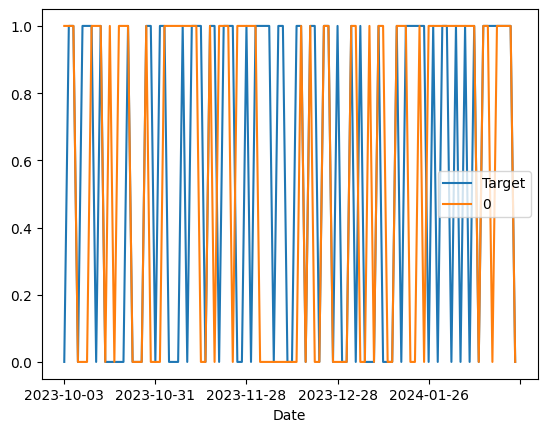

In [183]:
#Skapa en data frame som kombinerar testdatans target med våra förutsägelser.
combined = pd.concat([test['Target'], preds], axis=1)

#Plotta för att få överblick över vårt resultat.
combined.plot()

In [184]:
#Vi skapar en mer robust testmetod i form av ett "backtest". Den simulerar att vi går tillbaka i tiden och testar hur modellen hade presterat.

#Vi definierar en separat predict-funktion för att göra koden mer överskådlig.
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

#Backtest funktionen startar med att träna på de första 2500 raderna av data och förutse efterföljande 250 rader.
#Träningsdatan expanderas successivt genom att och stega fram till nutid med steg om 250 rader. Alla förutsägelser sparas i listan all_predictions.
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [185]:
#Genomför backtest på vår modell.
predictions = backtest(omxs30, model, predictors)

#Beräkna hur många dagar vi förutsåg att marknaden skulle gå upp och ner kommande handelsdag
predictions["Predictions"].value_counts()


Predictions
0    669
1    660
Name: count, dtype: int64

In [186]:
#Beräkna andel förutsägelser av testdatan som var korrekta.
#Vi får 52.4%, om det är ett bra värde eller inte beror på om det överträffar slumpmässig handel.
precision_score(predictions['Target'], predictions['Predictions'])

0.5242424242424243

In [187]:
#Beräkna andel dagar som testdatans värde gick upp kommande handelsdag, detta motsvarar slumpmässig handel.
#Resultatet visar att värdet gick upp 52.7% för kommande handelsdagar. Dvs det är bättre att slumpmässigt köpa OMXS30 än att följa denna modell.
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.527464
0    0.472536
Name: count, dtype: float64

In [188]:
#Försök förbättra modellen genom att lägga till rolling averages.
#Horisonterna som analyseras är 2, 5, 60, 250 och 1000 dagar bakåt i tiden.
horizons = [2,5,60,250,1000]
new_predictors = []

#Skapa kolumner för rolling averages i vår data frame. Dessa ersätter tidigare features.
for horizon in horizons:
    rolling_averages = omxs30.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    omxs30[ratio_column] = omxs30["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    omxs30[trend_column] = omxs30.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]



In [189]:
#omxs30

In [190]:
#Vår data frame innehåller nu många NaN värden som kommer raderas.
#Spara sista raden så vi kan använda den för att förutsäga kommande handelsdag (det sista vi gör).
sista_raden = omxs30.tail(1).copy()

#Radera alla rader med NAN värden, dessa rader är inte kompletta och kan inte användas.
omxs30 = omxs30.dropna()


In [191]:
#Uppdatera parametrar i modellen i hopp om att förbättra våra förutsägelser
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [192]:
#Uppdatera predict-funnktionen så att den behöver vara 60% säker innan den förutsäger att värdet kommer gå upp kommande handelsdag.
#Förhoppningen är att göra modellen mer konservativ men att den oftare gör korrekta förutsägelser.

def predict(train, test, predictors, model):
    
    model.fit(train[predictors], train['Target'])

    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

In [193]:
#Kör nytt backtest för att se hur väl modellen presterar.
predictions = backtest(omxs30, model, new_predictors)

In [194]:
#Beräkna hur många dagar vi förutsåg att marknaden skulle gå upp och ner kommande handelsdag.
predictions["Predictions"].value_counts()

Predictions
0.0    289
1.0     39
Name: count, dtype: int64

In [195]:
#Beräkna andel förutsägelser av testdatan som var korrekta.
#Vi får 46.2%, om det är ett bra värde eller inte beror på om det överträffar slumpmässig handel.
precision_score(predictions['Target'], predictions['Predictions'])


0.46153846153846156

In [196]:
#Beräkna andel dagar som testdatans värde gick upp kommande handelsdag, detta motsvarar slumpmässig handel.
#Resultatet visar att värdet gick upp 51.2% för kommande handelsdagar. Dvs vår modell blev sämre och det är bättre att slumpmässigt köpa OMXS30 än att följa denna modell.
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.512195
0    0.487805
Name: count, dtype: float64

In [197]:
#Förutsäg om värdet på OMXS30 kommer gå upp kommande handelsdag.
pred_tomorrow = model.predict(sista_raden[new_predictors])
if pred_tomorrow[0] == 0:
    print("model.predict förutsäger att värdet kommer gå NER kommande handelsdag")
else:
    print("model.predict förutsäger att värdet kommer gå UPP kommande handelsdag")

#Förutsäg morgondagen med model.proba() som returnerar sannolikheten att priset går upp eller ner.
#Kräv 60% säkerhet att priset går upp innan vi sätter target = 1
pred_tomorrow_proba = model.predict_proba(sista_raden[new_predictors])[:,1]
pred_tomorrow_proba[pred_tomorrow_proba >= .6] = 1
pred_tomorrow_proba[pred_tomorrow_proba < .6] = 0
pred_tomorrow_proba = pd.Series(pred_tomorrow_proba, index=sista_raden.index, name='Predictions')
if pred_tomorrow_proba[0] == 0:
    print("model.predict_proba (med 60% säkerhet) förutsäger att värdet kommer gå NER kommande handelsdag")
else:
    print("model.predict_proba (med 60% säkerhet) förutsäger att värdet kommer gå UPP kommande handelsdag")


model.predict förutsäger att värdet kommer gå NER kommande handelsdag
model.predict_proba (med 60% säkerhet) förutsäger att värdet kommer gå NER kommande handelsdag


C:\Users\svafre\AppData\Local\Temp\ipykernel_23692\608176568.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pred_tomorrow_proba[0] == 0:
